In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [5]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T


In [15]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

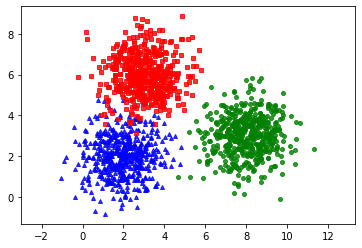

In [16]:
kmeans_display(X, original_label)

In [28]:
def kmeans_init_centers(X, k):
    #random pick k rows of X as initial centers 
    return X[np.random.choice(X.shape[0], k, replace = False)]

In [19]:
# Gan lai nhan moi
def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    # return index of thw closest center
    return np.argmin(D, axis = 1)

In [20]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [25]:
def has_coverged(centers, new_centers):
    # return True if two  sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [40]:
# the main in K-mean
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_coverged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[3.01526309 6.01727812]
 [1.97039435 2.03266013]
 [8.01033137 3.0298224 ]]


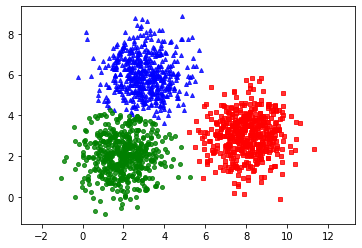

In [42]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

## Dùng thư viên Scikit-learn

Centers found by scikit-learn:
[[8.01033137 3.0298224 ]
 [1.97039435 2.03266013]
 [3.01526309 6.01727812]]


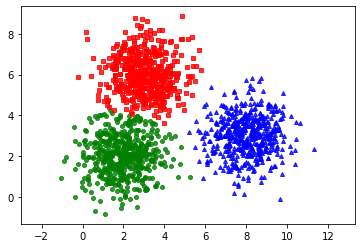

In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

# Một số hạn chế


Chúng ta cần biết đại lượng K là số lượng clusters. Trong thực tế, nhiều trường hợp chúng ta không xác định được giá trị này. 

Nghiệm cuối cùng phụ thuộc vào các centers được khởi tạo ban đầu

Các clusgter cần có lượng điểm gần bằng nhau


Các cluster cần có dạng hình tròn


Khi một cluster năm phía trong 1 culster khác
